### Pydantic Data validation

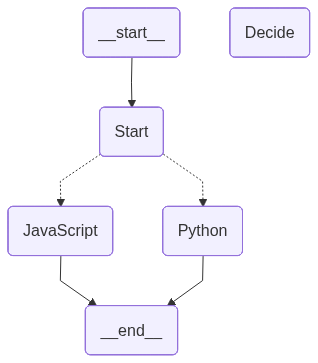

In [12]:
from langgraph.graph import StateGraph,START,END
from pydantic import BaseModel, Field
from typing import Literal
import random
from IPython.display import Image,display

class State(BaseModel):
    pr_language:str
    topic:str
    name:str

def start(state:State):
    print("Starting node has been called!")
    return {"pr_language":state.pr_language,"topic":state.topic,"name":state.name}

def python_project(state:State):
    print(f"{state.name} is creating a python project on {state.topic} topic")
    return {"pr_language":"Python","topic":state.topic,"name":state.name}

def javascript_project(state:State):
    print(f"{state.name} is creating a javascript project on {state.topic} topic")
    return {"pr_language":"JavaScript","topic":state.topic,"name":state.name}

def decide_language(state:State)->Literal["Python","JavaScript"]:
    return random.choice(["Python","JavaScript"])

builder=StateGraph(State)
builder.add_node("Start",start)
builder.add_node("Python",python_project)
builder.add_node("JavaScript",javascript_project)
builder.add_node("Decide",decide_language)
builder.add_edge(START, "Start")
builder.add_conditional_edges("Start",decide_language)
builder.add_edge("Python",END)
builder.add_edge("JavaScript",END)

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))





In [17]:
graph.invoke({"name":"John","topic":"Web Development","pr_language":"Python"})

Starting node has been called!
John is creating a javascript project on Web Development topic


{'pr_language': 'JavaScript', 'topic': 'Web Development', 'name': 'John'}

In [ ]:
## Pydantic will raise an error if the data is not valid
graph.invoke({"name":123,"topic":"Web Development","pr_language":"Python"})

ValidationError: 1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type